# Class 4 (Monday 31 October)

These tasks are designed to be worked on in the practical class on Monday 31 October.

In this class, we will make heavy use of the [finite difference code for solving a Poisson problem](https://gist.github.com/mscroggs/45ab606d6e69b811122b2697821267b1)
that we wrote in lectures. You can find this code [here](https://gist.github.com/mscroggs/45ab606d6e69b811122b2697821267b1).

## Comparing dense and sparse storage
Copy the codes we that wrote to generate the matrix in dense and sparse formats.

For a sensible range of $N$, measure how much memory a dense matrix and a COO matrix use.
You can print the amount of memory a dense matrix uses by running:

In [1]:
import numpy as np
from scipy.sparse import coo_matrix, linalg
import matplotlib.pylab as plt

In [2]:
def make_matrix(N):
  A = np.zeros(((N+1)**2, (N+1)**2))
  b = np.zeros((N+1)**2)

  h = 1/N

  for i in range(N+1):
    A[i, i] = 1
    b[i] = 0
  for i in range(N**2+N, (N+1)**2):
    A[i,i] = 1
    b[i] = 0
  for i in range(N + 1, N**2+N, N+1):
    A[i,i] = 1
    b[i] = 0
  for i in range(2* N + 1, (N+1)**2-1, N+1):
    A[i,i] = 1
    b[i] = 0
  for i in range(1, N):
    for j in range(1, N):
      index = j * (N+1) + i
      A[index,index] = 4/h**2
      A[index,j * (N+1) + i-1] = -1/h**2
      A[index,(j-1) * (N+1) + i] = -1/h**2
      A[index,j * (N+1) + i+1] = -1/h**2
      A[index,(j+1) * (N+1) + i] = -1/h**2
      b[index] = 1
  return A, b

In [3]:
a,b = make_matrix(100)
print(a.nbytes)

832483208


In [4]:
def make_matrix_sparse(N):
  rows = []
  cols = []
  data = []
  b = np.zeros((N+1)**2)

  h = 1/N

  for i in range(N+1):
    rows.append(i)
    cols.append(i)
    data.append(1.0)
    b[i] = 0
  for i in range(N**2+N, (N+1)**2):
    rows.append(i)
    cols.append(i)
    data.append(1.0)
    b[i] = 0
  for i in range(N + 1, N**2+N, N+1):
    rows.append(i)
    cols.append(i)
    data.append(1.0)
    b[i] = 0
  for i in range(2* N + 1, (N+1)**2-1, N+1):
    rows.append(i)
    cols.append(i)
    data.append(1.0)
    b[i] = 0
  for i in range(1, N):
    for j in range(1, N):
      index = j * (N+1) + i
      rows += [index, index, index, index, index]
      cols += [index, j * (N+1) + i-1, (j-1) * (N+1) + i, j * (N+1) + i+1, (j+1) * (N+1) + i]
      data += [4/h**2, -1/h**2, -1/h**2, -1/h**2, -1/h**2]
      b[index] = 1

  rows = np.array(rows)
  cols = np.array(cols)
  data = np.array(data)
  # Note: The error we saw in lectures was in the next line: data, rows, and cols in the wrong order
  A = coo_matrix((data, (rows, cols)), ((N+1)**2, (N+1)**2))
  return A, b

You can print the amount of memory a COO matrix uses by running:


In [5]:
c,d = make_matrix_sparse(100)
print(c.row.nbytes + c.col.nbytes + c.data.nbytes)

790480


Create a plot that shows the memory used by the dense and COO sparse format against $N$.
What do you notice?


In [7]:
Ns = np.linspace(10,100,100,dtype=int)

normal = []
sparse = []
for N in Ns:
    
    a,b = make_matrix(N)
    c,d = make_matrix_sparse(N)
    
    normal.append(a.nbytes)
    sparse.append(c.row.nbytes + c.col.nbytes + c.data.nbytes)

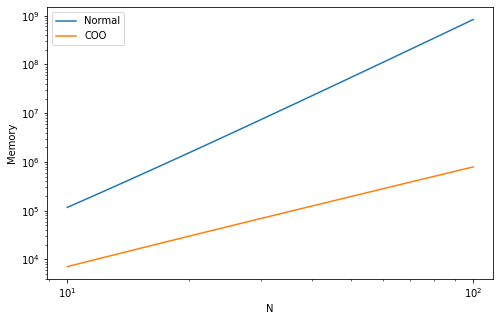

In [8]:
fig,ax = plt.subplots(figsize=(8,5))

ax.plot(Ns,normal,label="Normal")
ax.plot(Ns,sparse,label="COO")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("N")
ax.set_ylabel("Memory")
ax.legend();

Use `scipy.sparse.spsolve` and `numpy.linalg.solve` to solve the problem for a range of values of $N$.
Plot the time both solution methods taks against $N$.
What do you notice?

In [10]:
from time import time

In [13]:
Ns = np.linspace(10,50,100,dtype=int)

time_normal = []
time_sparse = []
for N in Ns:
    
    A,B = make_matrix(N)
    A2,B2 = make_matrix_sparse(N)
    
    start = time()
    #Solve the normal matrix
    sol1 = np.linalg.solve(A, B)
    time_normal.append(time()-start)
    
    start = time()
    # Do a sparse solve
    sol2 = linalg.spsolve(A2, B2)
    time_sparse.append(time()-start)


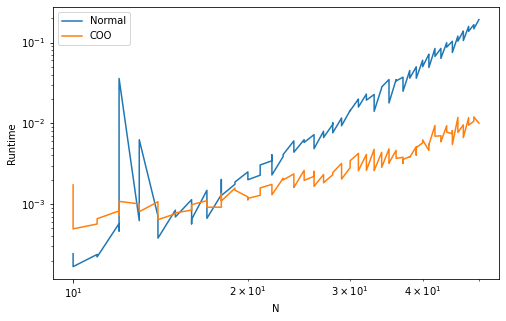

In [15]:
fig,ax = plt.subplots(figsize=(8,5))

ax.plot(Ns,time_normal,label="Normal")
ax.plot(Ns,time_sparse,label="COO")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("N")
ax.set_ylabel("Runtime")
ax.legend();

## Comparing sparse formats
SciPy can convert between different sparse formats, for example

In [3]:
from scipy.sparse import coo_matrix

matrix = coo_matrix(...)
csr_mat = matrix.tocsr()

TypeError: no supported conversion for types: (dtype('O'),)

For a range of values of $N$, measure how much storage space is needed to store the matrix for the Poisson problem if the matrix is stored as
a COO matrix, a CSR matrix, or a CSC matrix.
For a CSR matrix, the amount of memory used can be printed by running

In [4]:
from scipy.sparse import coo_matrix

matrix = coo_matrix(...)
csr_mat = matrix.tocsr()
print(c.data.nbytes + c.indices.nbytes + c.indptr.nbytes)

TypeError: no supported conversion for types: (dtype('O'),)

Make a plot showing the amount of memory needed vs $N$. Which format is the most memory efficient?

Optional extension: Scipy also supports LIL, DIA, DOK, and BSR sparse formats. Add these to your plot.

## When is a sparse matrix worth it?
In this section, we will investigate how many zeros we need a matrix to have for sparse storage to be worth doing.

Create a 10 by 10 matrix which is all zeros except for $M$ random numbers in random positions.
Measure the amount of memory needed to store this as a dense and different sparse matrix formats.
Make a plot showing the amount of memory needed against $M$.
What proportion of the matrix needs to be zeros for sparse storage to use less space? When are different sparse formats more efficient?

Repeat this with a 40 by 40 matrix.
What proportion of the matrix needs to be zeros for sparse storage to use less space? When are different sparse formats more efficient?